# SVM and K Nearest Neighbor of Iris Dataset

<p style="text-align:justify;"> The Iris flower dataset, also known as Fisher's Iris dataset, is a collection of multivariate data. It was introduced by Ronald Fisher, a British statistician, eugenicist, and biologist, in his 1936 paper titled "The use of multiple measurements in taxonomic problems" as an illustrative example of linear discriminant analysis. This dataset is sometimes referred to as Anderson's Iris dataset, as it was compiled by Edgar Anderson to quantify the morphological variations among Iris flowers belonging to three closely related species. Notably, two of these species were gathered from the Gaspé Peninsula. The collection process involved picking flowers from the same pasture on the same day, and the measurements were taken simultaneously by the same person using the same equipment. Fisher's publication in the journal "Annals of Eugenics" sparked debates about whether the Iris dataset should continue to be used for teaching statistical techniques in the present day. </p>

<p style="text-align:justify;"> The dataset comprises 50 samples from each of the three Iris species: Iris setosa, Iris virginica, and Iris versicolor. Each sample was measured for four features: the length and width of both sepals and petals, measured in centimeters. Utilizing these four feature measurements, Fisher devised a linear discriminant model to differentiate between the different species. </p>

![](https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png)

### Importing the Dependencies

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [3]:
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Distribution plots

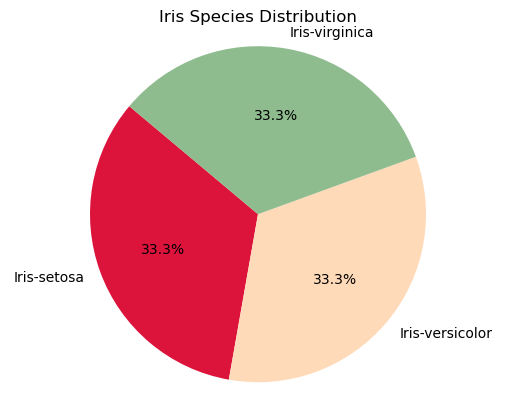

In [4]:
species_counts = df['species'].value_counts()
custom_colors = ['crimson', 'peachpuff', 'darkseagreen']
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)
plt.axis('equal')
plt.title('Iris Species Distribution')
plt.show()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

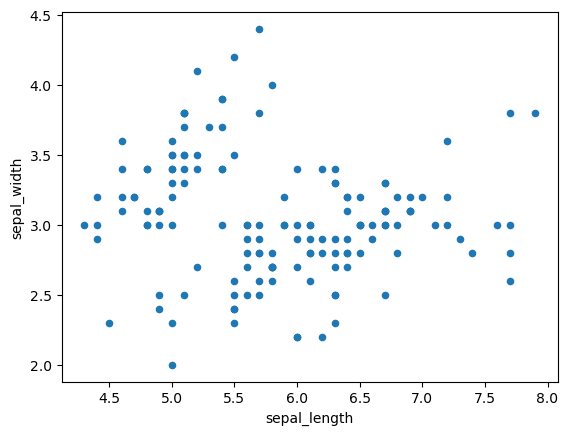

In [5]:
df.plot(kind="scatter", x="sepal_length", y="sepal_width")

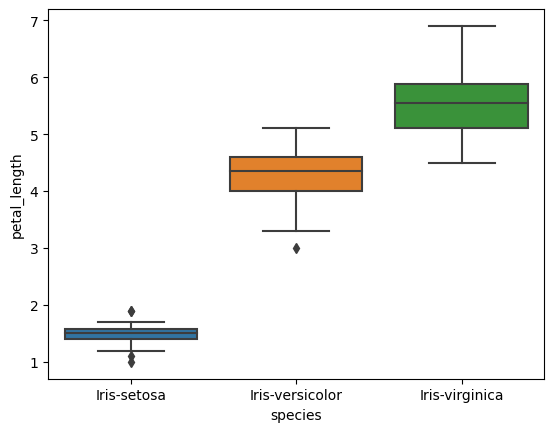

In [9]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


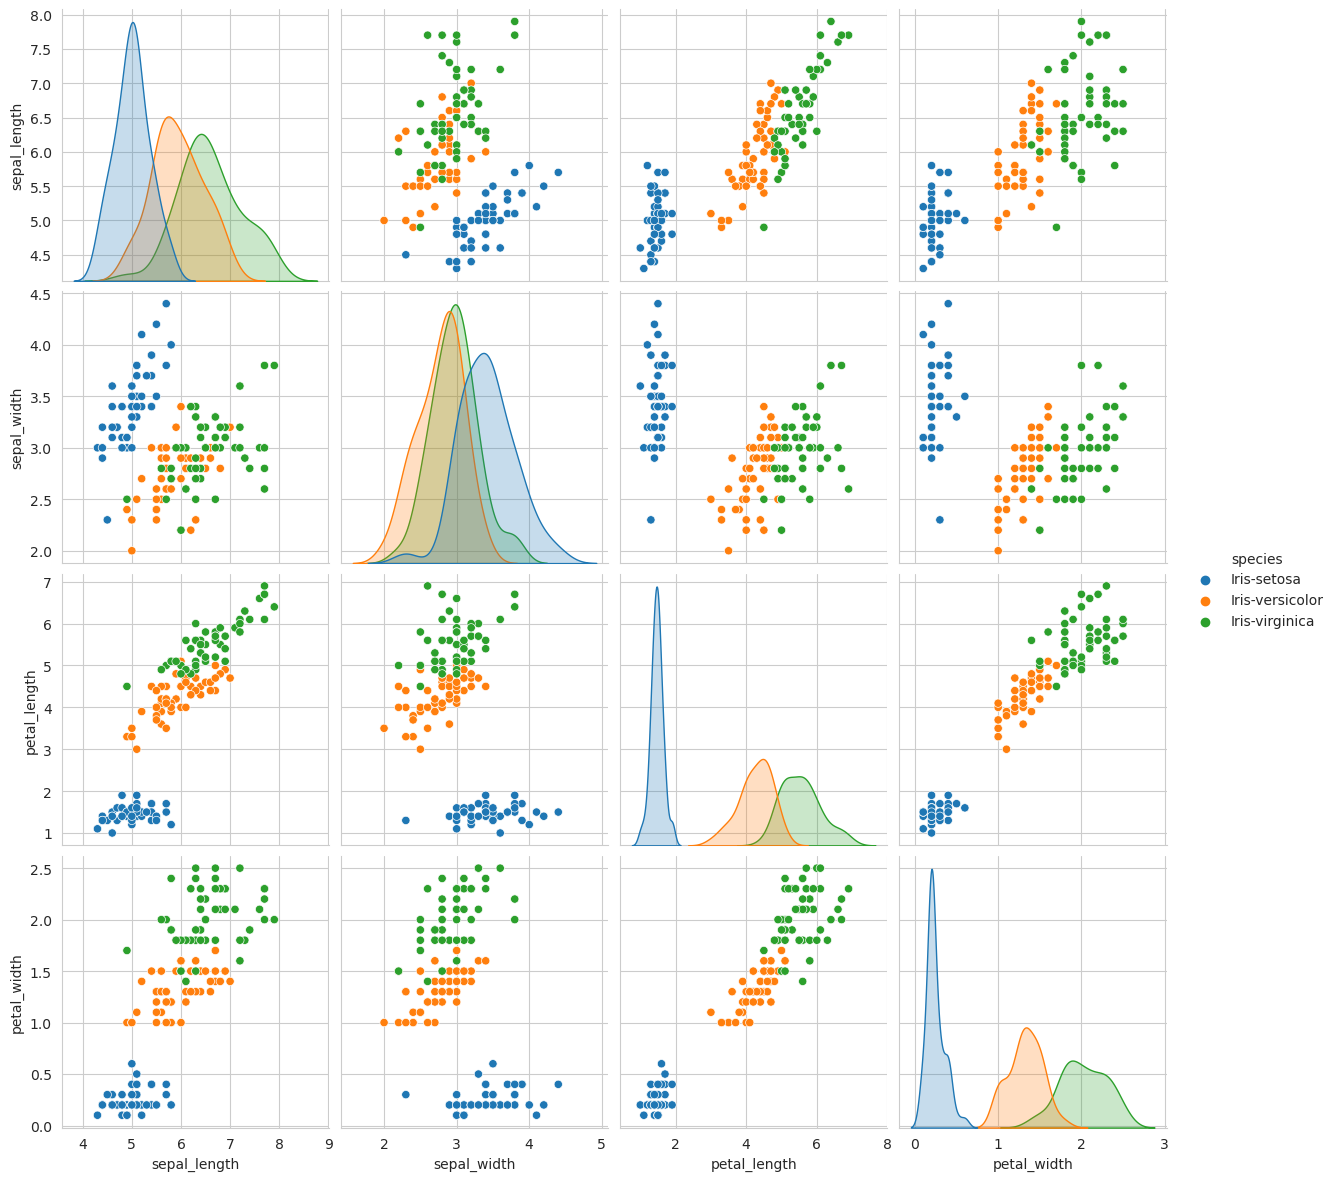

In [12]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",height=3);
plt.show()

## Support Vector Machine (SVM)
A Support Vector Machine (SVM) is a supervised machine learning algorithm that focuses on finding the best possible decision boundary (hyperplane) that separates data points of different classes with the maximum margin. It aims to classify data into two or more classes based on the features provided.

In [ ]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=5)

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

### Cross Validation

In [ ]:
scores = cross_val_score(svm_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the average score and its variance
print("Mean Accuracy: {:.2f}".format(scores.mean()))
print("Score Variance: {:.2f}".format(scores.std()))


## K Nearest Neighbor (KNN) Classification
The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [ ]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
y_pred_knn = KNN_model.predict(X_test)

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(knn_accuracy)

In [ ]:
knn_scores = cross_val_score(KNN_model, X_train, y_train, cv=5)
print("Mean Accuracy: {:.2f}".format(scores.mean()))
print("Score Variance: {:.2f}".format(scores.std()))